In [1]:
import timeSeries_processing as tsp

# PREREQUISITES

In the examples shown in this document, the air pollution datasets of EEA will be used. For this reason, the [EEA-datasets-handler](https://github.com/EnricoPittini/EEA-datasets-handler) library will be used.

In particular,the PM10 mean concentrations in Italy are considered, with respect to 2020.

In [2]:
import EEA_datasets_handler as eea

In [ ]:
# Download the datasets 
# IT'S NECESSARY ONLY IF THEY HAVEN'T BEEN DOWNLOADED YET
dest_path = "C:\\Datasets"
countries_cities_dict = {"IT": "all"} 
pollutants = ["PM10"] 
years = [2020]
eea.download_datasets(dest_path, countries_cities_dict, pollutants, years)

In [3]:
# Load the datasets
source_path = "C:\\Datasets\\EEA"
countries_cities_dict = {"IT":"all"}
pollutants = ["PM10"]
years = [2020]
df = eea.load_datasets(source_path,countries_cities_dict,pollutants,years)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158282 entries, 0 to 158281
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Countrycode               158282 non-null  object 
 1   Namespace                 158282 non-null  object 
 2   AirQualityNetwork         158282 non-null  object 
 3   AirQualityStation         158282 non-null  object 
 4   AirQualityStationEoICode  158282 non-null  object 
 5   SamplingPoint             158282 non-null  object 
 6   SamplingProcess           158282 non-null  object 
 7   Sample                    158207 non-null  object 
 8   AirPollutant              158282 non-null  object 
 9   AirPollutantCode          158282 non-null  object 
 10  AveragingTime             158282 non-null  object 
 11  Concentration             133256 non-null  float64
 12  UnitOfMeasurement         158282 non-null  object 
 13  DatetimeBegin             158282 non-null  o

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
0,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,54.000000,µg/m3,2020-01-11 00:00:00 +01:00,2020-01-12 00:00:00 +01:00,1,3
1,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,54.000000,µg/m3,2020-01-12 00:00:00 +01:00,2020-01-13 00:00:00 +01:00,1,3
2,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,80.000000,µg/m3,2020-01-13 00:00:00 +01:00,2020-01-14 00:00:00 +01:00,1,3
3,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,93.000000,µg/m3,2020-01-14 00:00:00 +01:00,2020-01-15 00:00:00 +01:00,1,3
4,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,89.000000,µg/m3,2020-01-15 00:00:00 +01:00,2020-01-16 00:00:00 +01:00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158277,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,11.795832,µg/m3,2020-12-26 00:00:00 +01:00,2020-12-27 00:00:00 +01:00,1,3
158278,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,40.525830,µg/m3,2020-12-27 00:00:00 +01:00,2020-12-28 00:00:00 +01:00,1,3
158279,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,20.899164,µg/m3,2020-12-28 00:00:00 +01:00,2020-12-29 00:00:00 +01:00,1,3
158280,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,40.594994,µg/m3,2020-12-29 00:00:00 +01:00,2020-12-30 00:00:00 +01:00,1,3


In [4]:
# Process the datasets
df_mean, _, _ = eea.preprocessing(df, fill=True, fill_n_days=10 ,fill_aggr="mean")
df_mean

C:\Users\Enrico\anaconda3\lib\site-packages\EEA_datasets_handler.py:806: UserWarning: Missing days: ['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-10', '2020-02-11']
  warnings.warn("Missing days: "+str(list(missing_days.strftime('%Y-%m-%d'))))


,mean
Datetime,
2020-01-01,76.974569
2020-01-02,56.675791
2020-01-03,55.216906
2020-01-04,54.887035
2020-01-05,28.192059
...,...
2020-12-27,14.997987
2020-12-28,16.317778
2020-12-29,23.536875


In addition, also a metereological dataset will be used (i.e. `meteorological_data_2020`). It will be loaded later on. 

These data have been obtained using the [ILMETEO](https://www.ilmeteo.it/) Website.

# FUNCTIONS TO MANIPULATE DATES

Auxiliary functions which work with dates.

In [78]:
import pandas as pd
days = pd.date_range("2020-01-01","2020-01-04").append(pd.date_range("2020-01-11","2020-03-14"))
print(days)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18',
               '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
      

In [79]:
tsp.find_missing_days(days)

DatetimeIndex(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq=None)

In [80]:
print(tsp.group_days_by(days,criterion="year"))
print()
print(tsp.group_days_by(days,criterion="month"))
print()
print(tsp.group_days_by(days,criterion="season"))

[('2020', DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18',
               '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-0

In [81]:
day = pd.Timestamp("2020-04-15")

print(tsp.find_same_month_days(day)) 
print()
print(tsp.find_same_season_days(day))

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23'

In [82]:
print(tsp.find_k_years_ago_days(day,k=4,n_days=11))
print()

print(tsp.find_k_years_ago_days(day,k=4,n_days="month"))
print()

print(tsp.find_k_years_ago_days(day,k=4,n_days="season"))
print()

DatetimeIndex(['2016-04-10', '2016-04-11', '2016-04-12', '2016-04-13',
               '2016-04-14', '2016-04-15', '2016-04-16', '2016-04-17',
               '2016-04-18', '2016-04-19', '2016-04-20'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10', '2016-04-11', '2016-04-12',
               '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-16',
               '2016-04-17', '2016-04-18', '2016-04-19', '2016-04-20',
               '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24',
               '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28',
               '2016-04-29', '2016-04-30'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '201

In [83]:
print(tsp.find_current_year_days(day, n_days=11))
print()

print(tsp.find_current_year_days(day, n_days=11, current_day=True))
print()

print(tsp.find_current_year_days(day, n_days="month", current_day=True))
print()

print(tsp.find_current_year_days(day, n_days="season", current_day=False))
print()

DatetimeIndex(['2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10

# FUNCTION TO PLOT A TIME SERIES

<AxesSubplot:title={'center':'Time series values'}, xlabel='Days', ylabel='mean'>

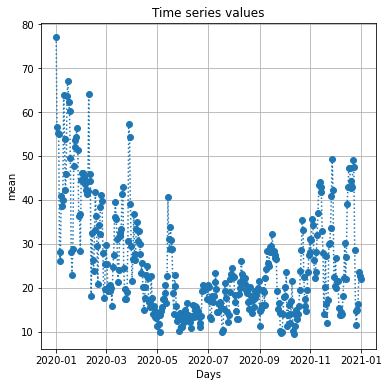

In [10]:
tsp.plot_timeSeries(df_mean, col_name="mean", figsize=(6,6))

<AxesSubplot:title={'center':'Time series values'}, xlabel='Days', ylabel='mean'>

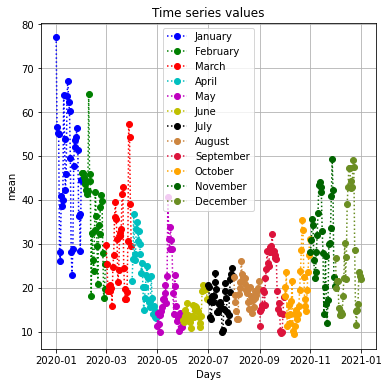

In [11]:
tsp.plot_timeSeries(df_mean, col_name="mean", divide="month", figsize=(6,6))

<AxesSubplot:title={'center':'Time series values'}, xlabel='Days', ylabel='mean'>

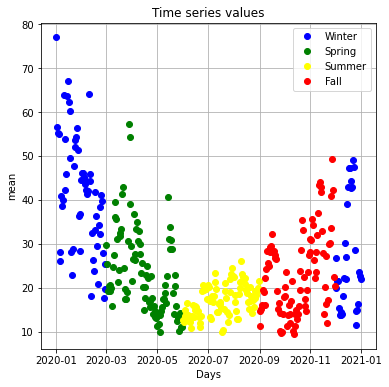

In [13]:
tsp.plot_timeSeries(df_mean, col_name="mean", divide="season", line=False, figsize=(6,6))

# add_timeSeries_dataframe

Load `meteorological_data_2020.csv`, which contains meteorological data about Italy in 2020. (It has been obtained using [ILMETEO](https://www.ilmeteo.it/)).

In [6]:
import pandas as pd
df_meteo = pd.read_csv("meteorological_data_2020.csv",index_col=0)
df_meteo = df_meteo.set_index(pd.DatetimeIndex(df_meteo.index))

In [7]:
df_meteo.info()
df_meteo

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TMEDIA °C          366 non-null    float64
 1   TMIN °C            366 non-null    float64
 2   TMAX °C            366 non-null    float64
 3   PUNTORUGIADA °C    366 non-null    float64
 4   UMIDITA %          366 non-null    float64
 5   VISIBILITA km      366 non-null    float64
 6   VENTOMEDIA km/h    366 non-null    float64
 7   VENTOMAX km/h      366 non-null    float64
 8   RAFFICA km/h       366 non-null    float64
 9   PRESSIONESLM mb    366 non-null    float64
 10  PRESSIONEMEDIA mb  366 non-null    float64
 11  PIOGGIA mm         366 non-null    float64
dtypes: float64(12)
memory usage: 37.2 KB


,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,PRESSIONEMEDIA mb,PIOGGIA mm
2020-01-01,5.202196,0.173764,11.003131,2.534921,75.400344,16.156784,7.012758,13.023608,0.0,1028.970020,0.0,0.0
2020-01-02,4.774801,0.182640,10.325979,2.465371,78.058483,15.880184,6.966149,12.185646,0.0,1030.733348,0.0,0.0
2020-01-03,4.885063,0.531284,9.658314,3.231408,81.535958,16.139090,5.948631,10.975893,0.0,1027.118509,0.0,0.0
2020-01-04,6.162960,1.381113,11.354987,3.776887,79.979083,16.473732,6.768174,13.554989,0.0,1023.379968,0.0,0.0
2020-01-05,6.551925,1.686219,12.409042,3.172703,68.848841,17.870075,9.782989,18.613108,0.0,1025.567681,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,3.366679,0.191966,6.335378,2.162273,80.374981,16.946089,8.373068,16.888885,0.0,1001.183619,0.0,0.0
2020-12-28,4.014919,1.075045,6.692360,3.125000,87.748644,11.109177,13.816230,27.218354,0.0,992.389919,0.0,0.0
2020-12-29,4.921844,1.494424,8.174234,3.427775,85.676591,12.655763,9.622137,18.752669,0.0,999.328145,0.0,0.0
2020-12-30,5.007944,2.084797,8.026350,3.539751,88.368509,11.634365,7.926860,15.825013,0.0,1004.437032,0.0,0.0


In [9]:
df_meteo = df_meteo[["TMEDIA °C","TMIN °C"]] # Focus on two features

In [10]:
df_mean_met, X, y = tsp.add_timeSeries_dataframe(df=df_mean, df_other=df_meteo, y_col="mean")

In [11]:
df_mean_met

,mean,TMEDIA °C,TMIN °C
Datetime,,,
2020-01-01,76.974569,5.202196,0.173764
2020-01-02,56.675791,4.774801,0.182640
2020-01-03,55.216906,4.885063,0.531284
2020-01-04,54.887035,6.162960,1.381113
2020-01-05,28.192059,6.551925,1.686219
...,...,...,...
2020-12-27,14.997987,3.366679,0.191966
2020-12-28,16.317778,4.014919,1.075045
2020-12-29,23.536875,4.921844,1.494424


The `add_timeSeries_dataframe` function, like all the other following processing functions, also returns the `X` and `y` numpy arrays.

In [20]:
X # Contains the explanatory features

array([[ 5.20219576,  0.17376411],
       [ 4.77480103,  0.18264044],
       [ 4.88506323,  0.5312842 ],
       [ 6.16295977,  1.38111267],
       [ 6.55192451,  1.68621891],
       [ 4.55391366,  0.61115109],
       [ 2.62864489, -0.99138223],
       [ 3.7207561 , -0.42611325],
       [ 4.26103639, -0.71598666],
       [ 5.5886528 ,  0.60886076],
       [ 5.76592089,  0.47124603],
       [ 5.47536483,  1.03039838],
       [ 4.2906024 , -0.24437726],
       [ 4.30190439, -0.04794869],
       [ 5.44510059,  1.82439534],
       [ 5.78574254,  1.11146587],
       [ 5.85725588,  0.5567925 ],
       [ 6.72510376,  3.07443884],
       [ 6.00486302,  2.14677805],
       [ 6.21243784,  2.59029724],
       [ 5.04881329,  1.31427441],
       [ 5.18232934,  0.33338042],
       [ 5.28177554,  0.2798316 ],
       [ 5.51737681,  0.57891614],
       [ 7.1094279 ,  3.86540855],
       [ 7.20527555,  3.64678062],
       [ 7.15664557,  2.21858047],
       [ 8.88234629,  6.03757911],
       [ 9.1957109 ,

In [22]:
y # Contains the response feature. It has been scaled

array([1.        , 0.69936896, 0.67776243, 0.67287694, 0.27751628,
       0.24652335, 0.46364727, 0.4323436 , 0.450411  , 0.80705539,
       0.6582936 , 0.48497419, 0.53898003, 0.80161642, 0.85440625,
       0.78269998, 0.7518062 , 0.59348505, 0.27736707, 0.20026144,
       0.28810984, 0.56534763, 0.65398233, 0.63206399, 0.6642047 ,
       0.69506819, 0.62197136, 0.39715901, 0.40522439, 0.28102485,
       0.52041563, 0.54364621, 0.54147607, 0.53022544, 0.52004159,
       0.50562527, 0.48668098, 0.47315194, 0.48075124, 0.80784271,
       0.54098571, 0.51430001, 0.12899232, 0.34166921, 0.25098551,
       0.2118916 , 0.35118668, 0.47911109, 0.39750183, 0.2959135 ,
       0.16996786, 0.36619306, 0.3363639 , 0.42957547, 0.46857668,
       0.44812558, 0.27374897, 0.12216556, 0.15038488, 0.23601898,
       0.30093957, 0.23680431, 0.14395305, 0.16142612, 0.16508493,
       0.14584715, 0.15349481, 0.09520335, 0.22471405, 0.26675514,
       0.39438958, 0.44418108, 0.38916216, 0.3188532 , 0.17615

*With the input parameter `y_scale`, the user can decide whether to scale or not the response feature.*

# add_k_previous_days

In [5]:
df_mean_temp, X, y = tsp.add_k_previous_days(df=df_mean, col_name="mean", k=5, y_col="mean") 

In [6]:
df_mean_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2020-01-06 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    361 non-null    float64
 1   mean_1  361 non-null    float64
 2   mean_2  361 non-null    float64
 3   mean_3  361 non-null    float64
 4   mean_4  361 non-null    float64
 5   mean_5  361 non-null    float64
dtypes: float64(6)
memory usage: 19.7 KB


In [15]:
df_mean_temp

,mean,mean_1,mean_2,mean_3,mean_4,mean_5
Datetime,,,,,,
2020-01-06,26.099399,28.192059,54.887035,55.216906,56.675791,76.974569
2020-01-07,40.759729,26.099399,28.192059,54.887035,55.216906,56.675791
2020-01-08,38.646087,40.759729,26.099399,28.192059,54.887035,55.216906
2020-01-09,39.866008,38.646087,40.759729,26.099399,28.192059,54.887035
2020-01-10,63.946840,39.866008,38.646087,40.759729,26.099399,28.192059
...,...,...,...,...,...,...
2020-12-27,14.997987,11.480358,14.695619,28.473515,47.568209,49.143828
2020-12-28,16.317778,14.997987,11.480358,14.695619,28.473515,47.568209
2020-12-29,23.536875,16.317778,14.997987,11.480358,14.695619,28.473515


*The names of the added columns have the structure "ColumnName_i", with i from 1 to k*

# add_k_years_ago_statistics

Get the EEA datasets about the PM10 mean concentrations  in Italy, with respect to 2019 (i.e. one year before 2020).

In [ ]:
# Download the datasets 
# IT'S NECESSARY ONLY IF THEY HAVEN'T BEEN DOWNLOADED YET
dest_path = "C:\\Datasets"
countries_cities_dict = {"IT": "all"} 
pollutants = ["PM10"] 
years = [2019]
eea.download_datasets(dest_path, countries_cities_dict, pollutants, years)

In [7]:
# Load the datasets
source_path = "C:\\Datasets\\EEA"
countries_cities_dict = {"IT": "all"}
pollutants = ["PM10"]
years = [2019] 
df_prev_year = eea.load_datasets(source_path, countries_cities_dict, pollutants, years)

df_prev_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235386 entries, 0 to 235385
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Countrycode               235386 non-null  object 
 1   Namespace                 235386 non-null  object 
 2   AirQualityNetwork         235386 non-null  object 
 3   AirQualityStation         235386 non-null  object 
 4   AirQualityStationEoICode  235386 non-null  object 
 5   SamplingPoint             235386 non-null  object 
 6   SamplingProcess           235386 non-null  object 
 7   Sample                    235130 non-null  object 
 8   AirPollutant              235386 non-null  object 
 9   AirPollutantCode          235386 non-null  object 
 10  AveragingTime             235386 non-null  object 
 11  Concentration             218964 non-null  float64
 12  UnitOfMeasurement         235386 non-null  object 
 13  DatetimeBegin             235386 non-null  o

In [8]:
# Process the datasets
df_prev_year_mean, df_prev_year_min, df_prev_year_max = eea.preprocessing(df_prev_year)

First example: **days_to_select is an odd integer**

In [9]:
df_mean_temp, X, y = tsp.add_k_years_ago_statistics(df=df_mean, df_k_years_ago=df_prev_year_mean, k=1, days_to_select=11, 
                                                    y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-01 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-02 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-03 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processin

*A warning is given:* 
- *for each day for which less days than the ones expected are selected;* 
- *for each day for which no day has been selected.*

In [10]:
df_mean_temp

,mean,1_years_ago_mean
Datetime,,
2020-01-01,76.974569,26.371291
2020-01-02,56.675791,26.875353
2020-01-03,55.216906,28.239070
2020-01-04,54.887035,28.412754
2020-01-05,28.192059,27.278523
...,...,...
2020-12-27,14.997987,24.077666
2020-12-28,16.317778,25.042372
2020-12-29,23.536875,25.884439


*The names of the added columns have the structure "k_years_ago_ColumnName"*

In order to compute the value for a 2020 day, the 11 days of 2019 that are centered on that day are selected.

In [11]:
# 2020-04-15
import pandas as pd
print(df_mean_temp["1_years_ago_mean"].loc[pd.Timestamp("2020-04-15")])
df_prev_year_mean["mean"].loc[pd.date_range('2019-04-10','2019-04-20')].mean()

18.504581483793103


18.504581483793103

In [12]:
# 2020-10-22
print(df_mean_temp["1_years_ago_mean"].loc[pd.Timestamp("2020-10-22")])
df_prev_year_mean["mean"].loc[pd.date_range('2019-10-17','2019-10-27')].mean()

26.68901718805421


26.68901718805421

In [13]:
# 2020-01-01: example with less than 11 days
print(df_mean_temp["1_years_ago_mean"].loc[pd.Timestamp("2020-01-01")])
df_prev_year_mean["mean"].loc[pd.date_range('2019-01-01','2019-01-06')].mean()

26.37129108442753


26.37129108442753

In [14]:
# 2020-12-27: example with less than 11 days
print(df_mean_temp["1_years_ago_mean"].loc[pd.Timestamp("2020-12-27")])
df_prev_year_mean["mean"].loc[pd.date_range('2019-12-22','2019-12-31')].mean()

24.0776657907545


24.0776657907545

*With the input parameter `scale`, the user can decide which is the statistical aggregation to be used.* 

**days_to_select is "month" (/"season")**

In [15]:
df_mean_temp, _, _ = tsp.add_k_years_ago_statistics(df = df_mean, df_k_years_ago=df_prev_year_mean, k=1, 
                                                    days_to_select="month", y_col="mean")

In [16]:
df_mean_temp

,mean,1_years_ago_mean
Datetime,,
2020-01-01,76.974569,25.813125
2020-01-02,56.675791,25.813125
2020-01-03,55.216906,25.813125
2020-01-04,54.887035,25.813125
2020-01-05,28.192059,25.813125
...,...,...
2020-12-27,14.997987,26.776342
2020-12-28,16.317778,26.776342
2020-12-29,23.536875,26.776342


In order to compute the value for a 2020 day, the days of the same month in 2019 are selected.

In [39]:
# January
import pandas as pd
df_prev_year_mean["mean"].loc[pd.date_range('2019-01-01','2019-01-31')].mean()

25.813124974351396

**More columns**

The same logic is applied individually on each column of `df_prev_year_mean`

In [17]:
df_prev_year_mean["COLUMN"] = df_prev_year_mean["mean"]*2 # Put a second column

In [18]:
df_mean_temp, _ ,_ = tsp.add_k_years_ago_statistics(df_mean, df_k_years_ago=df_prev_year_mean, k=1, days_to_select=11, 
                                                    y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-01 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-02 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-03 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processin

In [19]:
df_mean_temp

,mean,1_years_ago_mean,1_years_ago_COLUMN
Datetime,,,
2020-01-01,76.974569,26.371291,52.742582
2020-01-02,56.675791,26.875353,53.750707
2020-01-03,55.216906,28.239070,56.478140
2020-01-04,54.887035,28.412754,56.825508
2020-01-05,28.192059,27.278523,54.557047
...,...,...,...
2020-12-27,14.997987,24.077666,48.155332
2020-12-28,16.317778,25.042372,50.084744
2020-12-29,23.536875,25.884439,51.768877


With the input parameter `columns_to_select`, the user can specify which are the columns to be taken into account.

In [20]:
df_mean_temp,_,_ = tsp.add_k_years_ago_statistics(df_mean, df_k_years_ago=df_prev_year_mean, k=1, days_to_select=11, 
                                                  columns_to_select = ["mean"], y_col="mean", )

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-01 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-02 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:657: UserWarning: For the day 2020-01-03 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processin

In [21]:
df_mean_temp

,mean,1_years_ago_mean
Datetime,,
2020-01-01,76.974569,26.371291
2020-01-02,56.675791,26.875353
2020-01-03,55.216906,28.239070
2020-01-04,54.887035,28.412754
2020-01-05,28.192059,27.278523
...,...,...
2020-12-27,14.997987,24.077666
2020-12-28,16.317778,25.042372
2020-12-29,23.536875,25.884439


**days_to_select is a function**

It's a predicate that decides which days have to be selected

In [22]:
# Predicate of selection
f = lambda day, df, prev_day, prev_df : abs(df["mean"][day]-prev_df["mean"][prev_day])<3

df_mean_temp, _, _ = tsp.add_k_years_ago_statistics(df=df_mean, df_k_years_ago=df_prev_year_mean, k=1, 
                                                    days_to_select=f, y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:654: UserWarning: No 1 years ago days have been found for the day 2020-01-01
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:654: UserWarning: No 1 years ago days have been found for the day 2020-01-16
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


In [23]:
df_mean_temp

,mean,1_years_ago_mean,1_years_ago_COLUMN
Datetime,,,
2020-01-01,76.974569,23.034827,46.069654
2020-01-02,56.675791,56.540150,113.080300
2020-01-03,55.216906,55.693172,111.386345
2020-01-04,54.887035,55.693172,111.386345
2020-01-05,28.192059,27.994942,55.989884
...,...,...,...
2020-12-27,14.997987,15.388949,30.777898
2020-12-28,16.317778,16.423637,32.847274
2020-12-29,23.536875,23.249990,46.499979


For each 2020 day, the 2019 days with similar PM10 concentration are selected (i.e. the 2019 days whose PM10 concentration differ from the PM10 concentration of the 2020 day less than 3).

**replace_miss**

By default, the parameter `replace_miss` is True. I.e. the missing days are filled.

In [24]:
# replace_miss True
f = lambda day,df,prev_day,prev_df : abs(df["mean"][day]-prev_df["mean"][prev_day])<3

df_mean_temp, _, _ = tsp.add_k_years_ago_statistics(df=df_mean, df_k_years_ago=df_prev_year_mean, k=1, 
                                                    days_to_select=f, replace_miss=True, y_col="mean")

df_mean_temp

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:654: UserWarning: No 1 years ago days have been found for the day 2020-01-01
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:654: UserWarning: No 1 years ago days have been found for the day 2020-01-16
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


,mean,1_years_ago_mean,1_years_ago_COLUMN
Datetime,,,
2020-01-01,76.974569,23.034827,46.069654
2020-01-02,56.675791,56.540150,113.080300
2020-01-03,55.216906,55.693172,111.386345
2020-01-04,54.887035,55.693172,111.386345
2020-01-05,28.192059,27.994942,55.989884
...,...,...,...
2020-12-27,14.997987,15.388949,30.777898
2020-12-28,16.317778,16.423637,32.847274
2020-12-29,23.536875,23.249990,46.499979


*The 2020-01-01 is a missing day, and it has been filled.*

In [25]:
# replace_miss False
f = lambda day,df,prev_day,prev_df : abs(df["mean"][day]-prev_df["mean"][prev_day])<3

df_mean_temp, _, _ = tsp.add_k_years_ago_statistics(df=df_mean, df_k_years_ago=df_prev_year_mean, k=1, 
                                                    days_to_select=f, replace_miss=False, y_col="mean")

df_mean_temp

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:654: UserWarning: No 1 years ago days have been found for the day 2020-01-01
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:654: UserWarning: No 1 years ago days have been found for the day 2020-01-16
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


,mean,1_years_ago_mean,1_years_ago_COLUMN
Datetime,,,
2020-01-01,76.974569,NaN,NaN
2020-01-02,56.675791,56.540150,113.080300
2020-01-03,55.216906,55.693172,111.386345
2020-01-04,54.887035,55.693172,111.386345
2020-01-05,28.192059,27.994942,55.989884
...,...,...,...
2020-12-27,14.997987,15.388949,30.777898
2020-12-28,16.317778,16.423637,32.847274
2020-12-29,23.536875,23.249990,46.499979


# add_current_year_statistics

First example: **days_to_select is an integer.**

In [26]:
df_mean_temp, _, _ = tsp.add_current_year_statistics(df_mean, df_current_year=df_mean, days_to_select=11, y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-02 only these current year days have been found: ['2020-01-01']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-03 only these current year days have been found: ['2020-01-01', '2020-01-02']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-04 only these current year days have been found: ['2020-01-01', '2020-01-02', '2020-01-03']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\li

*The same warnings of the previous function are given.*

In [27]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,66.825180
2020-01-04,54.887035,62.955755
2020-01-05,28.192059,60.938575
2020-01-06,26.099399,54.389272
...,...,...
2020-12-27,14.997987,38.072739
2020-12-28,16.317778,35.527418
2020-12-29,23.536875,32.718678


*The names of the added columns have the structure "current_year_ColumnName"*

In [65]:
df_mean

,mean
Datetime,
2020-01-01,76.974569
2020-01-02,56.675791
2020-01-03,55.216906
2020-01-04,54.887035
2020-01-05,28.192059
...,...
2020-12-27,14.997987
2020-12-28,16.317778
2020-12-29,23.536875


In order to compute the value for a day, the 11 days preceding that day are selected.

In [28]:
# 2020-04-15
import pandas as pd
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-04-15")])
df_mean["mean"].loc[pd.date_range('2020-04-04','2020-04-14')].mean()

28.44221962405437


28.44221962405437

In [29]:
# 2020-10-22
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-10-22")])
df_mean["mean"].loc[pd.date_range('2020-10-11','2020-10-21')].mean()

15.826564427994192


15.826564427994192

In [30]:
# 2020-01-03: example with less than 11 days
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-03")])
df_mean["mean"].loc[pd.date_range('2020-01-01','2020-01-02')].mean()

66.82518027076988


66.82518027076988

In [31]:
# 2020-01-05: example with less than 11 days
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-05")])
df_mean["mean"].loc[pd.date_range('2020-01-01','2020-01-04')].mean()

60.938575393321


60.938575393321

*With the input parameter `scale`, the user can decide which is the statistical aggregation to be used.* 

**replace_miss**

By default, the parameter `replace_miss` is True. I.e. the missing days are filled.

The days for which no preceding day is found are deleted from the dataset.

In [32]:
df_mean_temp, _, _ = tsp.add_current_year_statistics(df_mean, df_current_year=df_mean, days_to_select=11, y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-02 only these current year days have been found: ['2020-01-01']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-03 only these current year days have been found: ['2020-01-01', '2020-01-02']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-04 only these current year days have been found: ['2020-01-01', '2020-01-02', '2020-01-03']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\li

In [33]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,66.825180
2020-01-04,54.887035,62.955755
2020-01-05,28.192059,60.938575
2020-01-06,26.099399,54.389272
...,...,...
2020-12-27,14.997987,38.072739
2020-12-28,16.317778,35.527418
2020-12-29,23.536875,32.718678


*No preceding day is present for the day 2020-01-01: this day has been removed.*

If `replace_miss` is False, the missing values are kept as Nan.

In [34]:
df_mean_temp, _, _ = tsp.add_current_year_statistics(df_mean, df_current_year=df_mean, days_to_select=11, replace_miss=False,
                                                     y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-02 only these current year days have been found: ['2020-01-01']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-03 only these current year days have been found: ['2020-01-01', '2020-01-02']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-04 only these current year days have been found: ['2020-01-01', '2020-01-02', '2020-01-03']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\li

In [35]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-01,76.974569,NaN
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,66.825180
2020-01-04,54.887035,62.955755
2020-01-05,28.192059,60.938575
...,...,...
2020-12-27,14.997987,38.072739
2020-12-28,16.317778,35.527418
2020-12-29,23.536875,32.718678


**current_day**

By default the parameter `current_day` is False. I.e. each day is not itself selected, but only the preceding days are selected.

Otherwise, if it's True, each day is itself selected.

In [36]:
df_mean_temp,_,_ = tsp.add_current_year_statistics(df_mean, df_current_year=df_mean, days_to_select=11, current_day=True, 
                                                   y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-01 only these current year days have been found: ['2020-01-01']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-02 only these current year days have been found: ['2020-01-01', '2020-01-02']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-03 only these current year days have been found: ['2020-01-01', '2020-01-02', '2020-01-03']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:874: UserWarning: For the day 2020-01-04 only these current year days have been found: ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+


In [37]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-01,76.974569,76.974569
2020-01-02,56.675791,66.825180
2020-01-03,55.216906,62.955755
2020-01-04,54.887035,60.938575
2020-01-05,28.192059,54.389272
...,...,...
2020-12-27,14.997987,35.527418
2020-12-28,16.317778,32.718678
2020-12-29,23.536875,30.565353


In order to compute the value for a day, the day itself and the 10 days preceding that day are selected.

In [38]:
# 2020-04-15
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-04-15")])
df_mean["mean"].loc[pd.date_range('2020-04-05','2020-04-15')].mean()

27.28543001471924


27.28543001471924

In [39]:
# 2020-10-22
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-10-22")])
df_mean["mean"].loc[pd.date_range('2020-10-12','2020-10-22')].mean()

18.122953462767608


18.122953462767608

In [40]:
# 2020-01-03: example with less than 11 days
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-03")])
df_mean["mean"].loc[pd.date_range('2020-01-01','2020-01-03')].mean()

62.95575545599534


62.95575545599534

In [41]:
# 2020-01-05: example with less than 11 days
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-05")])
df_mean["mean"].loc[pd.date_range('2020-01-01','2020-01-05')].mean()

54.38927215262471


54.38927215262471

It's important to notice that, despite the fact that `replcae_miss` is True, the day 2020-01-01 hasn't been removed: this is because it isn't a missing day anymore (it has been selected at least one day, which is the day itself).

**days_to_select is "month" (/"season")**

In [42]:
df_mean_temp, _, _ = tsp.add_current_year_statistics(df_mean, df_current_year=df_mean, days_to_select="month", y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-02-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-03-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-04-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\li

In [43]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,66.825180
2020-01-04,54.887035,62.955755
2020-01-05,28.192059,60.938575
2020-01-06,26.099399,54.389272
...,...,...
2020-12-27,14.997987,28.392754
2020-12-28,16.317778,27.896652
2020-12-29,23.536875,27.483120


In order to compute the value for a day, the preceding days that are in the same month are selected.

In [44]:
# 2020-04-15
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-04-15")])
df_mean["mean"].loc[pd.date_range('2020-04-01','2020-04-14')].mean()

28.405827728851147


28.405827728851147

In [45]:
# 2020-10-22
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-10-22")])
df_mean["mean"].loc[pd.date_range('2020-10-01','2020-10-21')].mean()

16.255132480170204


16.255132480170204

*If `curret_day` is True, the day itself is also taken*

**days_to_select is a function**

It's a predicate that decides which preceding days have to be selected. (*If `curret_day` is True, the day itself can also be taken*).

In [46]:
# Predicate of selection
f = lambda day, df, current_day ,current_df: abs(df["mean"].loc[day]-current_df["mean"].loc[current_day])<3

df_mean_temp,_,_ = tsp.add_current_year_statistics(df=df_mean, df_current_year=df_mean, days_to_select=f, y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-02
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-05
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-07
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\li

In [47]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,56.675791
2020-01-04,54.887035,55.946348
2020-01-05,28.192059,60.938575
2020-01-06,26.099399,28.192059
...,...,...
2020-12-27,14.997987,15.034873
2020-12-28,16.317778,16.110946
2020-12-29,23.536875,23.132278


For each day, the preceding days with similar PM10 concentration are selected (i.e. the preceding days whose PM10 concentration differ from the PM10 concentration of the current day less than 3).

In [99]:
df_mean[:10]

,mean
Datetime,
2020-01-01,76.974569
2020-01-02,56.675791
2020-01-03,55.216906
2020-01-04,54.887035
2020-01-05,28.192059
2020-01-06,26.099399
2020-01-07,40.759729
2020-01-08,38.646087
2020-01-09,39.866008


In [48]:
# 2020-01-04: 2020-01-03 and 2020-01-02 are selected
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-04")])
(56.675791+55.216906)/2

55.94634849921039


55.9463485

In [49]:
# 2020-01-09: 2020-01-08 and 2020-01-07 are selected
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-09")])
(40.759729+38.646087)/2

39.70290812026687


39.702908

In [50]:
# 2020-01-05: is a missing day. The miss value is filled taking into account all the previous days.
print(df_mean_temp["current_year_mean"].loc[pd.Timestamp("2020-01-05")])
(76.974569+56.675791+55.216906+54.887035)/4

60.938575393321


60.93857525

**More columns**

The same logic is applied individually for each column of `df_current_year`. With the parameter `columns_to_select` the user can specify which are the columns that have to be used.

This is shown in the examples for the previous function : `add_k_years_ago_statistics`

**EXAMPLE WITH METEOROLOGICAL  DATA**

Load `meteorological_data_2020.csv`, which contains meteorological data about Italy in 2020. (It has been obtained using [ILMETEO](https://www.ilmeteo.it/)).

In [51]:
import pandas as pd
df_meteo = pd.read_csv("meteorological_data_2020.csv",index_col=0)
df_meteo = df_meteo.set_index(pd.DatetimeIndex(df_meteo.index))

In [52]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TMEDIA °C          366 non-null    float64
 1   TMIN °C            366 non-null    float64
 2   TMAX °C            366 non-null    float64
 3   PUNTORUGIADA °C    366 non-null    float64
 4   UMIDITA %          366 non-null    float64
 5   VISIBILITA km      366 non-null    float64
 6   VENTOMEDIA km/h    366 non-null    float64
 7   VENTOMAX km/h      366 non-null    float64
 8   RAFFICA km/h       366 non-null    float64
 9   PRESSIONESLM mb    366 non-null    float64
 10  PRESSIONEMEDIA mb  366 non-null    float64
 11  PIOGGIA mm         366 non-null    float64
dtypes: float64(12)
memory usage: 37.2 KB


Dataset with both the PM10 mean concentrations and the meteorological features

In [53]:
df_mean_met, _, _ = tsp.add_timeSeries_dataframe(df_mean, df_meteo, y_col="mean")

In [54]:
df_mean_met

,mean,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,PRESSIONEMEDIA mb,PIOGGIA mm
Datetime,,,,,,,,,,,,,
2020-01-01,76.974569,5.202196,0.173764,11.003131,2.534921,75.400344,16.156784,7.012758,13.023608,0.0,1028.970020,0.0,0.0
2020-01-02,56.675791,4.774801,0.182640,10.325979,2.465371,78.058483,15.880184,6.966149,12.185646,0.0,1030.733348,0.0,0.0
2020-01-03,55.216906,4.885063,0.531284,9.658314,3.231408,81.535958,16.139090,5.948631,10.975893,0.0,1027.118509,0.0,0.0
2020-01-04,54.887035,6.162960,1.381113,11.354987,3.776887,79.979083,16.473732,6.768174,13.554989,0.0,1023.379968,0.0,0.0
2020-01-05,28.192059,6.551925,1.686219,12.409042,3.172703,68.848841,17.870075,9.782989,18.613108,0.0,1025.567681,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,14.997987,3.366679,0.191966,6.335378,2.162273,80.374981,16.946089,8.373068,16.888885,0.0,1001.183619,0.0,0.0
2020-12-28,16.317778,4.014919,1.075045,6.692360,3.125000,87.748644,11.109177,13.816230,27.218354,0.0,992.389919,0.0,0.0
2020-12-29,23.536875,4.921844,1.494424,8.174234,3.427775,85.676591,12.655763,9.622137,18.752669,0.0,999.328145,0.0,0.0


In [55]:
f = lambda day,df,d,df_current_day: abs(df_current_day["TMEDIA °C"].loc[day]-df_current_day["TMEDIA °C"].loc[d])<0.5 

df_mean_temp,_,_ = tsp.add_current_year_statistics(df=df_mean, df_current_year=df_mean_met, 
                                                   days_to_select=f, replace_miss=False, # Miss values are not replaced
                                                   columns_to_select=["mean"], # Only the column "mean" is taken into account
                                                   y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-01
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-04
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-07
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:871: UserWarning: No current year days have been found for the day 2020-01-08
  warnings.warn("No current year days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\li

For each day, the preceding days which have similar mean temperatures are selected (i.e. the difference between the temperatures is less than 0.5).

In [56]:
df_mean_temp

,mean,current_year_mean
Datetime,,
2020-01-01,76.974569,NaN
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,66.825180
2020-01-04,54.887035,NaN
2020-01-05,28.192059,54.887035
...,...,...
2020-12-27,14.997987,38.646087
2020-12-28,16.317778,46.984483
2020-12-29,23.536875,39.790746


In [107]:
df_mean_met[["TMEDIA °C"]][:10]

,TMEDIA °C
Datetime,
2020-01-01,5.202196
2020-01-02,4.774801
2020-01-03,4.885063
2020-01-04,6.162960
2020-01-05,6.551925
2020-01-06,4.553914
2020-01-07,2.628645
2020-01-08,3.720756
2020-01-09,4.261036


In [108]:
df_mean_temp[:10]

,mean,current_year_mean
Datetime,,
2020-01-01,76.974569,NaN
2020-01-02,56.675791,76.974569
2020-01-03,55.216906,66.825180
2020-01-04,54.887035,NaN
2020-01-05,28.192059,54.887035
2020-01-06,26.099399,55.946348
2020-01-07,40.759729,NaN
2020-01-08,38.646087,NaN
2020-01-09,39.866008,26.099399


In [109]:
# 2020-01-03: 2020-01-02 and 2020-01-01 are selected
(56.675791+76.974569)/2

66.82518

In [110]:
# 2020-01-05: only 2020-01-04 is selected
54.887035

54.887035

In [111]:
# 2020-01-09: only 2020-01-06 is selected
26.099399

26.099399

# add_upTo_k_years_ago_statistics

Get the EEA datasets about the PM10 mean concentrations in Italy, with respect to 2018-2019-2020 (i.e. up to two years before 2020).

In [ ]:
# Download the datasets 
# IT'S NECESSARY ONLY IF THEY HAVEN'T BEEN DOWNLOADED YET
dest_path = "C:\\Datasets"
countries_cities_dict = {"IT": "all"} 
pollutants = ["PM10"] 
years = [2018, 2019, 2020]
eea.download_datasets(dest_path, countries_cities_dict, pollutants, years)

In [76]:
# Load the datasets
source_path = "C:\\Datasets\\EEA"
countries_cities_dict = {"IT":"all"}
pollutants = ["PM10"]
years = [2018, 2019, 2020] 
df_full = eea.load_datasets(source_path,countries_cities_dict,pollutants,years)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393668 entries, 0 to 393667
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Countrycode               393668 non-null  object 
 1   Namespace                 393668 non-null  object 
 2   AirQualityNetwork         393668 non-null  object 
 3   AirQualityStation         393668 non-null  object 
 4   AirQualityStationEoICode  393668 non-null  object 
 5   SamplingPoint             393668 non-null  object 
 6   SamplingProcess           393668 non-null  object 
 7   Sample                    393337 non-null  object 
 8   AirPollutant              393668 non-null  object 
 9   AirPollutantCode          393668 non-null  object 
 10  AveragingTime             393668 non-null  object 
 11  Concentration             352220 non-null  float64
 12  UnitOfMeasurement         393668 non-null  object 
 13  DatetimeBegin             393668 non-null  o

In [77]:
df_full_mean,df_full_min,df_full_max = eea.preprocessing(df_full)

C:\Users\Enrico\anaconda3\lib\site-packages\EEA_datasets_handler.py:806: UserWarning: Missing days: ['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-10', '2020-02-11']
  warnings.warn("Missing days: "+str(list(missing_days.strftime('%Y-%m-%d'))))


In [78]:
df_mean_temp,_,_ = tsp.add_upTo_k_years_ago_statistics(df_mean, df_upTo_k_years_ago=df_full_mean, k=2, days_to_select=11, 
                                                       y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:652: UserWarning: For the day 2020-01-01 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:652: UserWarning: For the day 2020-01-02 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:652: UserWarning: For the day 2020-01-03 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processin

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-01
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-02
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-03
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-04
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-25
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-26
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-27
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-28
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-04-30
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-01
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-02
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-03
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-26
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-27
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-28
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-29
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-08-27
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-08-28
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-08-29
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-08-30
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-10-22
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-10-23
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-10-24
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-10-25
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-12-20
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-12-21
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-12-22
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-12-23
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


In [79]:
df_mean_temp

,mean,upTo_2_years_ago_mean
Datetime,,
2020-01-01,76.974569,24.944020
2020-01-02,56.675791,27.880914
2020-01-03,55.216906,30.439158
2020-01-04,54.887035,32.203776
2020-01-05,28.192059,32.972802
...,...,...
2020-12-27,14.997987,33.063248
2020-12-28,16.317778,31.808265
2020-12-29,23.536875,30.577231


*The names of the added columns have the structure "upTo_k_years_ago_ColumnName".*

Basically, the function `add_k_years_ago_statistics` is applied for each of the specified previous years (i.e. for 2019 and for 2018) and then the mean of the computed values is calculated: in this way, for each day of 2020 an unique value is obtained, which sums up the two previous years. 

The semantics of the parameters `days_to_select`, `stat`, `columns_to_select`, `replace_miss` are the same seen for the function  `add_k_years_ago_statistics`.

**current_year**

By default,  the parameter `current_year` is False. I.e. the current year (2020 in our case) is not considered. 

Otherwise, if `current_year` is True, the current year is considered: that means that not only the function `add_k_years_ago_statistics` is applied two times, but also the function `add_current_year_statistics` is applied one time. The final values in the DataFrame are computed calculating the mean of the values produced by these three functions.

In [81]:
df_mean_temp,_,_ = tsp.add_upTo_k_years_ago_statistics(df_mean, df_upTo_k_years_ago=df_full_mean, k=2, current_year=True, 
                                                       days_to_select=11, current_day=False, y_col="mean")

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:652: UserWarning: For the day 2020-01-01 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:652: UserWarning: For the day 2020-01-02 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:652: UserWarning: For the day 2020-01-03 only these 1 years ago days have been found: ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08']
  warnings.warn(("For the day "+day.strftime('%Y-%m-%d')+
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processin

C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-03
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-04
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-05
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-02-06
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-27
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-28
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-29
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-03-30
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-01
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-02
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-03
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-05-04
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-06
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-07
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-08
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-06-09
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-07-25
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-07-26
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-07-27
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-07-28
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-09-23
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-09-24
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-09-25
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-09-26
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-11-22
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-11-23
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-11-24
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))
C:\Users\Enrico\anaconda3\lib\site-packages\timeSeries_processing.py:649: UserWarning: No 2 years ago days have been found for the day 2020-11-25
  warnings.warn("No "+str(k)+" years ago days have been found for the day " + day.strftime('%Y-%m-%d'))


In [82]:
df_mean_temp

,mean,upTo_2_years_ago_mean
Datetime,,
2020-01-01,76.974569,24.944020
2020-01-02,56.675791,27.880914
2020-01-03,55.216906,30.439158
2020-01-04,54.887035,32.203776
2020-01-05,28.192059,32.972802
...,...,...
2020-12-27,14.997987,33.063248
2020-12-28,16.317778,31.808265
2020-12-29,23.536875,30.577231


The semantics of the parameters `current_day` is the same seen for the function  `add_current_year_statistics`.